In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [2]:
trials=100_00_00     #total simulated events
low=-1;high=1;interval=high-low
test=interval*np.random.rand(trials,3)+low
#test
x=test[:,0]
y=test[:,1]
z=test[:,2]

In [3]:
x

array([ 0.78344032,  0.48730457,  0.8347623 , ..., -0.43246815,
        0.7504273 , -0.17508636])

In [4]:
y

array([-0.64998029,  0.14779506,  0.97837981, ...,  0.69818023,
        0.42159492, -0.09606517])

In [5]:
z

array([ 0.98670888, -0.53893883,  0.73518532, ..., -0.86129177,
       -0.19875842,  0.78228678])

In [6]:

r=np.sqrt(x**2+y**2+z**2)
r

array([1.41769091, 0.74146085, 1.48140224, ..., 1.19008733, 0.8833959 ,
       0.80737621])

In [7]:
test=np.column_stack((test,r))

In [8]:
df=pd.DataFrame(test,columns=['x','y','z','r']) #data frame with x,y,z and r
df.head()

,x,y,z,r
0,0.783440,-0.649980,0.986709,1.417691
1,0.487305,0.147795,-0.538939,0.741461
2,0.834762,0.978380,0.735185,1.481402
3,0.704756,0.206947,0.917863,1.175577
4,-0.025874,-0.770675,-0.231645,0.805151


In [9]:
df_less=df[df.r<0.5]          #data frame with r<0.5 (radius of the bead)
df_less.head()
total_counts=df_less.shape[0]
total_counts

65810

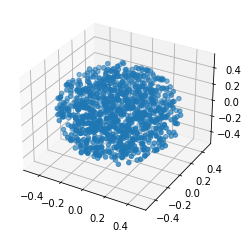

In [10]:
%matplotlib inline
df_sample=df_less.head(1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_sample.x,df_sample.y,df_sample.z)

In [11]:
#this function give the normal distance from a point to the surface of the sphere

def get_upward_distance(x,y,z,dz=0.001,r=0.5):
    '''
    returns normal distance from a point in the sphere to the surface as well as the z co-ordinate in the sphere
    '''
    #z=np.abs(z)
    d=np.sqrt(x**2+y**2+z**2)
    if z==-0.5: return 1.0,0.5 #z_up, z
    z_up=0
    #print(f"before while z_up: {z_up}")
    while(d<r):
        z+=dz
        #print(f"Inside while z: {z}")
        z_up+=dz
        d=np.sqrt(x**2+y**2+z**2)
    #print(f"after while z_up: {z_up}")
    return z_up,z
        
    

In [12]:
#distance travelled in the bead
df_less_copy=df_less.copy()

df_less_copy.loc[:,'z_new']=df_less_copy.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
df_less_copy.loc[:,'d_bead']=df_less_copy.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)
df_less_copy.head()

,x,y,z,r,z_new,d_bead
28,-0.249718,0.194551,0.020167,0.317200,0.387167,0.367
47,0.029020,0.252280,-0.025804,0.255251,0.431196,0.457
48,0.242115,0.266026,0.210240,0.416642,0.348240,0.138
53,-0.020887,-0.129138,0.468878,0.486785,0.482878,0.014
58,-0.078862,-0.235433,-0.198193,0.317692,0.434807,0.633


In [13]:
#distance travelled in the button
button_thickness=3.0
df_less_copy.loc[:,'d_button']=button_thickness/2.-df_less_copy.loc[:,'z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button
28,-0.249718,0.194551,0.020167,0.317200,0.387167,0.367,1.112833
47,0.029020,0.252280,-0.025804,0.255251,0.431196,0.457,1.068804
48,0.242115,0.266026,0.210240,0.416642,0.348240,0.138,1.151760
53,-0.020887,-0.129138,0.468878,0.486785,0.482878,0.014,1.017122
58,-0.078862,-0.235433,-0.198193,0.317692,0.434807,0.633,1.065193


In [14]:
#changing mm to cm
mm_to_cm=0.1
df_less_copy=df_less_copy*mm_to_cm
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button
28,-0.024972,0.019455,0.002017,0.031720,0.038717,0.0367,0.111283
47,0.002902,0.025228,-0.002580,0.025525,0.043120,0.0457,0.106880
48,0.024212,0.026603,0.021024,0.041664,0.034824,0.0138,0.115176
53,-0.002089,-0.012914,0.046888,0.048678,0.048288,0.0014,0.101712
58,-0.007886,-0.023543,-0.019819,0.031769,0.043481,0.0633,0.106519


$ P_{transmission} = e^{-\frac{x}{\lambda}} $ <br>

x is thickness and $\lambda$ is attenuation length
<br> $\lambda = \frac{1}{\rho \cdot \mu} $ <br>
$ P_{transmission} = e^{-\mu \cdot \rho \cdot x} $ <br>

$ \mu $ ($cm^2/g$) <br> $ \rho $ ($g/cm^3$) <br> $\lambda (cm)$ <br>
$ \mu$ from https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html
<br>
Tranmission factor from: https://www.ezag.com/home/products/isotope_products/isotrak_calibration_sources/reference_sources/gamma_sources/point_sources/#c601

# fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"")
# ceramic: O7410-Na300-Ca60-Mg10-Al600-Si1600-Pb4


![image](beadcomposition.png)

In [15]:
#Probabality of scatering from the button

button_density = 1.10         #.18        #g/cm^3 (from simulation data)
#button_mu_pb   = 0.1976       #C5H8O2 for 47keV (0.047 MeV) gamma rays
bead_mu_pb     = 3.195E-01    #47 keV pb-21O for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4
bead_mu_am     = 2.314E-01    #60 keV am-241 for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4

button_mu_pb =    1.797E-01     #C870O98N32
button_mu_am =    1.669E-01     #60 keV Am-241



#trnasmission factors from manufacturer
transmission_pb=0.964   #47 keV pb-210

transmission_am=0.958   #60 keV am-241

#Am-241 0.958


#button_mu_am=0.1815    #60 keV am-241
#lambda calculation for acrylic button  (C5H802)
#fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"");
#density is from oldmc




def transmission_prob(x,mu,rho):
    '''reutrns button transmission probability'''
    #return (1-np.exp(-1.0*x*mu*rho))
    return (np.exp(-1.0*x*mu*rho))

    
    
    

In [16]:
#adding the transmississin though button
df_less_copy.loc[:,'button_transmission_prob_pb']=df_less_copy.apply(lambda x:transmission_prob(x['d_button'],button_mu_pb,button_density),axis=1)
df_less_copy.loc[:,'button_transmission_prob_am']=df_less_copy.apply(lambda x:transmission_prob(x['d_button'],button_mu_am,button_density),axis=1)
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am
28,-0.024972,0.019455,0.002017,0.031720,0.038717,0.0367,0.111283,0.978243,0.979777
47,0.002902,0.025228,-0.002580,0.025525,0.043120,0.0457,0.106880,0.979095,0.980569
48,0.024212,0.026603,0.021024,0.041664,0.034824,0.0138,0.115176,0.977490,0.979077
53,-0.002089,-0.012914,0.046888,0.048678,0.048288,0.0014,0.101712,0.980095,0.981500
58,-0.007886,-0.023543,-0.019819,0.031769,0.043481,0.0633,0.106519,0.979164,0.980634


In [17]:
#creating the random number bewteen 0 and 1, if the prob_product is greater than random number add 1 else add 0
def random_assign(x):
    if x>np.random.rand():
        return 1
    return 0
    

In [18]:
#adding the transmississin though button
bead_density=2.55#g/cm^3  
df_less_copy.loc[:,'bead_transmission_prob_pb']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
df_less_copy.loc[:,'bead_transmission_prob_am']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am
28,-0.024972,0.019455,0.002017,0.031720,0.038717,0.0367,0.111283,0.978243,0.979777,0.970542,0.978577
47,0.002902,0.025228,-0.002580,0.025525,0.043120,0.0457,0.106880,0.979095,0.980569,0.963452,0.973394
48,0.024212,0.026603,0.021024,0.041664,0.034824,0.0138,0.115176,0.977490,0.979077,0.988820,0.991890
53,-0.002089,-0.012914,0.046888,0.048678,0.048288,0.0014,0.101712,0.980095,0.981500,0.998860,0.999174
58,-0.007886,-0.023543,-0.019819,0.031769,0.043481,0.0633,0.106519,0.979164,0.980634,0.949735,0.963338


In [19]:
N_generated=df_less.shape[0]
#df_less['N_emitted']=df_less['button_transmission_prob']*df_less['bead_transmission_prob']*N_generated
df_less_copy['prob_product_pb']=df_less_copy['button_transmission_prob_pb']*df_less_copy['bead_transmission_prob_pb']
df_less_copy['prob_product_am']=df_less_copy['button_transmission_prob_am']*df_less_copy['bead_transmission_prob_am']
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
28,-0.024972,0.019455,0.002017,0.031720,0.038717,0.0367,0.111283,0.978243,0.979777,0.970542,0.978577,0.949426,0.958787
47,0.002902,0.025228,-0.002580,0.025525,0.043120,0.0457,0.106880,0.979095,0.980569,0.963452,0.973394,0.943310,0.954480
48,0.024212,0.026603,0.021024,0.041664,0.034824,0.0138,0.115176,0.977490,0.979077,0.988820,0.991890,0.966562,0.971137
53,-0.002089,-0.012914,0.046888,0.048678,0.048288,0.0014,0.101712,0.980095,0.981500,0.998860,0.999174,0.978978,0.980689
58,-0.007886,-0.023543,-0.019819,0.031769,0.043481,0.0633,0.106519,0.979164,0.980634,0.949735,0.963338,0.929947,0.944682


In [20]:
#avg_of_prob_pb=round(df_less['prob_product_pb'].mean(),3)
avg_of_prob_am=round(df_less_copy['prob_product_am'].mean(),3)
avg_of_prob_am

0.958

In [21]:
avg_random=round(df_less_copy['prob_product_am'].apply(lambda x:random_assign(x)).mean(),3)
avg_random

0.957

In [22]:
def get_prob_am(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for am-241
    '''
    df_less_copy['bead_transmission_prob_am']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
    df_less_copy['prob_product_am']=df_less_copy['button_transmission_prob_am']*df_less_copy['bead_transmission_prob_am']
    avg_prob_am=round(df_less_copy['prob_product_am'].mean(),3)
    return [bead_density,avg_prob_am]

def get_prob_pb(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for pb-210
    '''
    df_less_copy['bead_transmission_prob_pb']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
    df_less_copy['prob_product_pb']=df_less_copy['button_transmission_prob_pb']*df_less_copy['bead_transmission_prob_pb']
    avg_prob_am=round(df_less_copy['prob_product_pb'].mean(),3)
    return [bead_density,avg_prob_am]

In [23]:
print(f"Prob of am {transmission_am}\n")
density_prob_am=[]
for i in np.linspace(0,5,50):
    test=get_prob_am(i)
    density_prob_am.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of am 0.958

test :[0.0, 0.98]
test :[0.10204081632653061, 0.979]
test :[0.20408163265306123, 0.978]
test :[0.30612244897959184, 0.977]
test :[0.40816326530612246, 0.976]
test :[0.5102040816326531, 0.975]
test :[0.6122448979591837, 0.974]
test :[0.7142857142857143, 0.974]
test :[0.8163265306122449, 0.973]
test :[0.9183673469387755, 0.972]
test :[1.0204081632653061, 0.971]
test :[1.1224489795918369, 0.97]
test :[1.2244897959183674, 0.969]
test :[1.3265306122448979, 0.968]
test :[1.4285714285714286, 0.968]
test :[1.5306122448979593, 0.967]
test :[1.6326530612244898, 0.966]
test :[1.7346938775510203, 0.965]
test :[1.836734693877551, 0.964]
test :[1.9387755102040818, 0.963]
test :[2.0408163265306123, 0.962]
test :[2.142857142857143, 0.962]
test :[2.2448979591836737, 0.961]
test :[2.3469387755102042, 0.96]
test :[2.4489795918367347, 0.959]
test :[2.5510204081632653, 0.958]
test :[2.6530612244897958, 0.957]
test :[2.7551020408163267, 0.957]
test :[2.857142857142857, 0.956]
test :[2.9591

In [24]:
print(f"Prob of pb {transmission_pb}\n")
density_prob_pb=[]
for i in np.linspace(0,5,50):
    test=get_prob_pb(i)
    density_prob_pb.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of pb 0.964

test :[0.0, 0.978]
test :[0.10204081632653061, 0.977]
test :[0.20408163265306123, 0.976]
test :[0.30612244897959184, 0.974]
test :[0.40816326530612246, 0.973]
test :[0.5102040816326531, 0.972]
test :[0.6122448979591837, 0.971]
test :[0.7142857142857143, 0.97]
test :[0.8163265306122449, 0.969]
test :[0.9183673469387755, 0.967]
test :[1.0204081632653061, 0.966]
test :[1.1224489795918369, 0.965]
test :[1.2244897959183674, 0.964]
test :[1.3265306122448979, 0.963]
test :[1.4285714285714286, 0.962]
test :[1.5306122448979593, 0.96]
test :[1.6326530612244898, 0.959]
test :[1.7346938775510203, 0.958]
test :[1.836734693877551, 0.957]
test :[1.9387755102040818, 0.956]
test :[2.0408163265306123, 0.955]
test :[2.142857142857143, 0.953]
test :[2.2448979591836737, 0.952]
test :[2.3469387755102042, 0.951]
test :[2.4489795918367347, 0.95]
test :[2.5510204081632653, 0.949]
test :[2.6530612244897958, 0.948]
test :[2.7551020408163267, 0.947]
test :[2.857142857142857, 0.945]
test :[2.9591

In [25]:
density_prob_am

[[0.0, 0.98],
 [0.10204081632653061, 0.979],
 [0.20408163265306123, 0.978],
 [0.30612244897959184, 0.977],
 [0.40816326530612246, 0.976],
 [0.5102040816326531, 0.975],
 [0.6122448979591837, 0.974],
 [0.7142857142857143, 0.974],
 [0.8163265306122449, 0.973],
 [0.9183673469387755, 0.972],
 [1.0204081632653061, 0.971],
 [1.1224489795918369, 0.97],
 [1.2244897959183674, 0.969],
 [1.3265306122448979, 0.968],
 [1.4285714285714286, 0.968],
 [1.5306122448979593, 0.967],
 [1.6326530612244898, 0.966],
 [1.7346938775510203, 0.965],
 [1.836734693877551, 0.964],
 [1.9387755102040818, 0.963],
 [2.0408163265306123, 0.962],
 [2.142857142857143, 0.962],
 [2.2448979591836737, 0.961],
 [2.3469387755102042, 0.96],
 [2.4489795918367347, 0.959],
 [2.5510204081632653, 0.958],
 [2.6530612244897958, 0.957],
 [2.7551020408163267, 0.957],
 [2.857142857142857, 0.956],
 [2.9591836734693877, 0.955],
 [3.0612244897959187, 0.954],
 [3.163265306122449, 0.953],
 [3.2653061224489797, 0.952],
 [3.36734693877551, 0.952],


In [26]:
density_prob_pb

[[0.0, 0.978],
 [0.10204081632653061, 0.977],
 [0.20408163265306123, 0.976],
 [0.30612244897959184, 0.974],
 [0.40816326530612246, 0.973],
 [0.5102040816326531, 0.972],
 [0.6122448979591837, 0.971],
 [0.7142857142857143, 0.97],
 [0.8163265306122449, 0.969],
 [0.9183673469387755, 0.967],
 [1.0204081632653061, 0.966],
 [1.1224489795918369, 0.965],
 [1.2244897959183674, 0.964],
 [1.3265306122448979, 0.963],
 [1.4285714285714286, 0.962],
 [1.5306122448979593, 0.96],
 [1.6326530612244898, 0.959],
 [1.7346938775510203, 0.958],
 [1.836734693877551, 0.957],
 [1.9387755102040818, 0.956],
 [2.0408163265306123, 0.955],
 [2.142857142857143, 0.953],
 [2.2448979591836737, 0.952],
 [2.3469387755102042, 0.951],
 [2.4489795918367347, 0.95],
 [2.5510204081632653, 0.949],
 [2.6530612244897958, 0.948],
 [2.7551020408163267, 0.947],
 [2.857142857142857, 0.945],
 [2.9591836734693877, 0.944],
 [3.0612244897959187, 0.943],
 [3.163265306122449, 0.942],
 [3.2653061224489797, 0.941],
 [3.36734693877551, 0.94],
 

In [42]:
#adding the columns to the single
transmission_pb=0.964   #47 keV pb-210

transmission_am=0.958   #60 keV am-241
all_densities=np.column_stack((density_prob_am,density_prob_pb))
columns=["density","am-prob","pb-prob"]
df_den=pd.DataFrame(all_densities[:,[0,1,3]],columns=columns)
df_den["am(0.958)-diff"]=df_den["am-prob"]-transmission_am
df_den["pb(0.964)-diff"]=df_den["pb-prob"]-transmission_pb
df_den["diff-sum"]=df_den["am(0.958)-diff"].abs()+df_den["pb(0.964)-diff"].abs()
df_den["diff-sum-quad"]=df_den["am(0.958)-diff"]**2+df_den["pb(0.964)-diff"]**2
df_den=df_den.round(5)
df_den.to_csv("combined_densities.csv",index=False)
df_den

,density,am-prob,pb-prob,am(0.958)-diff,pb(0.964)-diff,diff-sum,diff-sum-quad
0,0.00000,0.980,0.978,0.022,0.014,0.036,0.00068
1,0.10204,0.979,0.977,0.021,0.013,0.034,0.00061
2,0.20408,0.978,0.976,0.020,0.012,0.032,0.00054
3,0.30612,0.977,0.974,0.019,0.010,0.029,0.00046
4,0.40816,0.976,0.973,0.018,0.009,0.027,0.00041
5,0.51020,0.975,0.972,0.017,0.008,0.025,0.00035
6,0.61224,0.974,0.971,0.016,0.007,0.023,0.00031
7,0.71429,0.974,0.970,0.016,0.006,0.022,0.00029
8,0.81633,0.973,0.969,0.015,0.005,0.020,0.00025
9,0.91837,0.972,0.967,0.014,0.003,0.017,0.00021


In [43]:
minn,maxx=df_den['diff-sum'].min(),df_den['diff-sum'].max()

In [44]:
df_den.loc[df_den['diff-sum']==maxx]

,density,am-prob,pb-prob,am(0.958)-diff,pb(0.964)-diff,diff-sum
0,0.0,0.98,0.978,0.022,0.014,0.036


In [44]:
df_den.loc[df_den['diff-sum']==maxx]

,density,am-prob,pb-prob,am(0.958)-diff,pb(0.964)-diff,diff-sum
0,0.0,0.98,0.978,0.022,0.014,0.036


In [31]:
#read the file
df=pd.read_csv('combined_densities.csv')
df

,density,am-prob,pb-prob,am(0.958)-diff,pb(0.964)-diff,diff-sum
0,0.000,0.980,0.978,0.022,0.014,0.036
1,0.102,0.979,0.977,0.021,0.013,0.034
2,0.204,0.978,0.976,0.020,0.012,0.032
3,0.306,0.977,0.974,0.019,0.010,0.029
4,0.408,0.976,0.973,0.018,0.009,0.027
5,0.510,0.975,0.972,0.017,0.008,0.025
6,0.612,0.974,0.971,0.016,0.007,0.023
7,0.714,0.974,0.970,0.016,0.006,0.022
8,0.816,0.973,0.969,0.015,0.005,0.020
9,0.918,0.972,0.967,0.014,0.003,0.017


In [ ]:
df_abs=df.copy().abs()
cols=df_abs.columns.to_list()
x,y1,y2=df_abs[cols[0]].to_list(),df_abs[cols[3]].to_list(),df_abs[cols[4]].to_list()
x[:5],y1[:5],y2[:5]

In [ ]:
%matplotlib qtline
am_transmission=0.958
pb_transmission=0.964
fig,ax=plt.subplots(2,1,figsize=(5,4))
ax[0].plot(x,y1,'r.',label='am-diff')
ax[0].plot(x,y2,'b.',label='pb-diff')
ax[0].set_xlabel('density')
ax[0].set_ylabel('density difference')

ax[0].axvline(x=am_transmission,color='green',linestyle='--')
ax[0].axvline(x=pb_transmission,color='violet',linestyle='--')
ax[0].set_xlim(0,3)
ax[0].grid(which='both')
ax[0].legend()

ax[1].plot(x,y1,'r.',label='am-diff')
ax[1].plot(x,y2,'b.',label='pb-diff')
ax[1].set_xlabel('density')
ax[1].set_ylabel('density difference')

ax[1].axvline(x=am_transmission,color='green',linestyle='--')
ax[1].axvline(x=pb_transmission,color='violet',linestyle='--')
ax[1].set_xlim(0,1.05)
ax[1].grid(which='both')
ax[1].lege

nd()
plt.tight_layout()


In [ ]:
df_abs=df.copy().abs()
cols=df_abs.columns.to_list()
x,y1,y2=df_abs[cols[0]].to_list(),df_abs[cols[3]].to_list(),df_abs[cols[4]].to_list()
x[:5],y1[:5],y2[:5]

In [ ]:
%matplotlib qtline
am_transmission=0.958
pb_transmission=0.964
fig,ax=plt.subplots(2,1,figsize=(5,4))
ax[0].plot(x,y1,'r.',label='am-diff')
ax[0].plot(x,y2,'b.',label='pb-diff')
ax[0].set_xlabel('density')
ax[0].set_ylabel('density difference')

ax[0].axvline(x=am_transmission,color='green',linestyle='--')
ax[0].axvline(x=pb_transmission,color='violet',linestyle='--')
ax[0].set_xlim(0,3)
ax[0].grid(which='both')
ax[0].legend()

ax[1].plot(x,y1,'r.',label='am-diff')
ax[1].plot(x,y2,'b.',label='pb-diff')
ax[1].set_xlabel('density')
ax[1].set_ylabel('density difference')

ax[1].axvline(x=am_transmission,color='green',linestyle='--')
ax[1].axvline(x=pb_transmission,color='violet',linestyle='--')
ax[1].set_xlim(0,1.05)
ax[1].grid(which='both')
ax[1].lege

nd()
plt.tight_layout()


In [ ]:
df_abs